This notebook analyses the comments from instagram posts of the Kardashians using sentiment analysis. Later on two 
different sentiment analysis tools will be compared and how their scores differ. One tool is a pre made library called
Vader that can be downloaded and the other tool is the model that is created and trained here. The comments and posts have 
been downloaded using an instagram scraper found on github. The comments are stored in json files and the post images
are stored in a folder on the computer
This is the link to the instagram scraper: https://github.com/rarcega/instagram-scraper
Here are the links used for Vader: 
https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f
https://pypi.org/project/vader-sentiment/

In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os.path as op
import glob
from dateutil.relativedelta import relativedelta
import datetime
import json
from pandas.io.json import json_normalize
from tqdm import tqdm_notebook as tqdm

In [3]:
#search for all json files in a specific folder
PTH = r'C:\Users\km663\OneDrive\Documents\Uni\python and machine learning\kardash100'
FILES_JSON = glob.glob(op.join(PTH, '*.json')) 

In [4]:
FILES_JSON

['C:\\Users\\km663\\OneDrive\\Documents\\Uni\\python and machine learning\\kardash100\\kimkardashian.json',
 'C:\\Users\\km663\\OneDrive\\Documents\\Uni\\python and machine learning\\kardash100\\kourtneykardash.json',
 'C:\\Users\\km663\\OneDrive\\Documents\\Uni\\python and machine learning\\kardash100\\robkardashianofficial.json']

In [5]:
#select the precise json file
with open(FILES_JSON[0], encoding='utf-8', errors='ignore') as json_data:
         data = json.load(json_data, strict=False)

In [6]:
with open(FILES_JSON[1], encoding='utf-8', errors='ignore') as json_data2:
         data2 = json.load(json_data2, strict=False)

In [7]:
with open(FILES_JSON[2], encoding='utf-8', errors='ignore') as json_data2:
         data3 = json.load(json_data2, strict=False)

In [98]:
#make an empty array. loop through the json data, and add the posts into the empty array
images=[]
for pics in data['GraphImages']:
    images.append(pics)
for posts in data2['GraphImages']:
    images.append(posts)
for p in data3['GraphImages']:
    images.append(p)

In [99]:
#make a dataframe from the array of posts
all_images=pd.DataFrame(images)

In [100]:
#remove the columns that aren't needed
all_images=all_images.drop(columns={'comments','gating_info', 'owner', 'tags', 'urls','thumbnail_src', 'media_preview','shortcode', 'thumbnail_resources', 'taken_at_timestamp'})

In [101]:
#rename the columns to more suitable names
all_images=all_images.rename(columns={'edge_media_to_caption': 'caption', 'edge_media_to_comment': 'comments', 'edge_media_preview_like':'likes', 'display_url':'url'})

In [102]:
#get the number of comments
comment_count=[]
for i in all_images.comments:
    comment_count.append(i['count'])

In [103]:
all_images['comments']=comment_count

In [104]:
#get the number of likes
likes_count=[]
for i in all_images.likes:
    likes_count.append(i['count'])

In [105]:
all_images['likes']=likes_count

In [106]:
all_images

__typename  comments_disabled                       dimensions  \
0      GraphImage              False  {'height': 1196, 'width': 1080}   
1      GraphImage              False  {'height': 1347, 'width': 1080}   
2      GraphImage              False  {'height': 1350, 'width': 1080}   
3    GraphSidecar              False  {'height': 1080, 'width': 1080}   
4      GraphImage              False  {'height': 1261, 'width': 1080}   
..            ...                ...                              ...   
295    GraphImage              False  {'height': 1349, 'width': 1080}   
296    GraphImage              False  {'height': 1243, 'width': 1080}   
297    GraphImage              False  {'height': 1350, 'width': 1080}   
298    GraphVideo              False    {'height': 600, 'width': 480}   
299    GraphImage              False  {'height': 1080, 'width': 1080}   

                                                   url    likes  \
0    https://scontent-vie1-1.cdninstagram.com/v/t51...   676127   
1    https://scontent-vie1-1.cdninstagram.com/v/t51...  2000687   
2    https://scontent-vie1-1.cdninstagram.com/v/t51...   972243   
3    https://scontent-vie1-1.cdninstagram.com/v/t51...  3843920   
4    https://scontent-vie1-1.cdninstagram.com/v/t51...  2220824   
..                                                 ...      ...   
295  https://scontent-vie1-1.cdninstagram.com/v/t51...   180950   
296  https://scontent-vie1-1.cdninstagram.com/v/t51...     8156   
297  https://scontent-vie1-1.cdninstagram.com/v/t51...   273691   
298  https://scontent-vie1-1.cdninstagram.com/v/t51...    20039   
299  https://scontent-vie1-1.cdninstagram.com/v/t51...     7294   

                                               caption  comments  \
0    {'edges': [{'node': {'text': 'My mom and I on ...      2981   
1    {'edges': [{'node': {'text': 'Back to the Futu...      5825   
2         {'edges': [{'node': {'text': 'SKIMS.COM'}}]}      5766   
3    {'edges': [{'node': {'text': "Happy Birthday @...     19069   
4    {'edges': [{'node': {'text': 'Found this pic o...      7142   
..                                                 ...       ...   
295  {'edges': [{'node': {'text': 'Little Lady ❤️👒'...       862   
296  {'edges': [{'node': {'text': '@benballer HWD @...        61   
297  {'edges': [{'node': {'text': '❤️❤️ Dream and T...      2093   
298  {'edges': [{'node': {'text': 'Watch Scott @let...       131   
299  {'edges': [{'node': {'text': '@martika_avalon ...        62   

                      id  is_video               username  video_view_count  
0    2291582278230345892     False          kimkardashian               NaN  
1    2291172164780446756     False          kimkardashian               NaN  
2    2290855792246601686     False          kimkardashian               NaN  
3    2290162963589414246     False          kimkardashian               NaN  
4    2289703262041106368     False          kimkardashian               NaN  
..                   ...       ...                    ...               ...  
295  2103964789986708661     False  robkardashianofficial               NaN  
296  2103813005004037414     False  robkardashianofficial               NaN  
297  2103812668083956950     False  robkardashianofficial               NaN  
298  2102031998818624577      True  robkardashianofficial          463903.0  
299  2101617556578589501     False  robkardashianofficial               NaN  

[300 rows x 11 columns]

In [171]:
comments=[[]for post in data['GraphImages']]
post_id=0
for post in data['GraphImages']:
    post_id+=1
    for i in post['comments']['data']:
        comments[0].append(i['text'])
        comments[1].append(post_id)
for post2 in data2['GraphImages']:
    post_id+=1
    for i in post2['comments']['data']:
        comments[0].append(i['text'])
        comments[1].append(post_id)
for post3 in data3['GraphImages']:
    post_id+=1
    for i in post3['comments']['data']:
        comments[0].append(i['text'])
        comments[1].append(post_id)

In [172]:
all_comments=pd.DataFrame(columns=['comment','post_id'])

In [173]:
#make a dataframe from the array with comments
all_comments['comment']=comments[0]
all_comments['post_id']=comments[1]

In [174]:
all_comments

comment  post_id
0        Gotta repost this on Mother’s Day cause it’s s...        1
1                                   @kassy_k_angehell done        1
2                                                 ❤️🔥 #f4f        1
3                                                     💕💕💕💕        1
4                        @a.travellers.travelogue thankx 💕        1
...                                                    ...      ...
1560221                                                💕💕💕      300
1560222                                                 💕💕      300
1560223                                                 ♥️      300
1560224   Sigam por favor @mi.aandradee  @bru.aandradee 🙏🏻      300
1560225                                       🔥🔥🔥🔥🔥🔥🔥😍😍😍😍😍      300

[1560226 rows x 2 columns]

In [175]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [176]:
#import the pre-made sentiment analyser
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [177]:
analyser = SentimentIntensityAnalyzer()

In [178]:
#do sentiment analysis on the comments
sentiment_comments=[]
for c in comments[0]:
    vs = analyser.polarity_scores(c)
    sentiment_comments.append(vs)

In [179]:
sentiment_comments

[{'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'compound': 0.7845},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'compound': -0.34},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'compound': 0.886},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'compound': 0.875},
 {'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.6124},
 {'neg': 0.211, 'neu': 0.395, 'pos': 0.395, 'compound': 0.6369},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg'

In [180]:
#get the average score for each comment and put into an array
post_id=0
score=[[]for i in sentiment_comments]
for i in sentiment_comments:
    score[0].append(i['compound'])

In [181]:
df_score=pd.DataFrame(columns=['score','post_id'])

In [182]:
#make a dataframe from the average scores for each comment
df_score['score']=score[0]
df_score['post_id']=comments[1]

In [183]:
df_score

score  post_id
0        0.7845        1
1        0.0000        1
2       -0.3400        1
3        0.0000        1
4        0.0000        1
...         ...      ...
1560221  0.0000      300
1560222  0.0000      300
1560223  0.0000      300
1560224  0.4019      300
1560225  0.0516      300

[1560226 rows x 2 columns]

In [184]:
#get the mean score for each post from the comments
df_score_mean=df_score.groupby(['post_id']).mean()

In [185]:
df_score_mean

score
post_id          
1        0.204949
2        0.167215
3        0.148976
4        0.293698
5        0.293290
...           ...
296      0.444997
297      0.024911
298      0.475656
299      0.126321
300      0.079378

[299 rows x 1 columns]

In [186]:
#get the top 10 posts with the largest score
largest_score=df_score_mean.nlargest(10, 'score')

In [187]:
largest_score

score
post_id          
236      0.516813
298      0.475656
242      0.475568
257      0.473398
259      0.465171
227      0.464546
294      0.460178
280      0.448643
239      0.445810
296      0.444997

In [188]:
#get top 10 posts with lowest score
smallest_score=df_score_mean.nsmallest(10, 'score')

In [189]:
smallest_score

score
post_id          
229     -0.126633
282     -0.103968
262     -0.065945
208     -0.049098
231     -0.045935
211     -0.021822
221     -0.012613
248     -0.007253
263     -0.006556
210      0.004866

In [82]:
#the next 3 cells gets the file location of the pictures and loads them
import os
from keras.preprocessing.image import load_img, img_to_array
img_dir = r'C:\Users\km663\OneDrive\Documents\Uni\python and machine learning\kimkardashian'
img_dir1 = r'C:\Users\km663\OneDrive\Documents\Uni\python and machine learning\kourtneykardash'
img_dir2 = r'C:\Users\km663\OneDrive\Documents\Uni\python and machine learning\robkardashianofficial'

In [86]:
images = os.listdir(img_dir)
images1 = os.listdir(img_dir1)
images2 = os.listdir(img_dir2)

In [87]:
full_images = [os.path.join(img_dir, img) for img in images]
full_images1 = [os.path.join(img_dir1, img1) for img1 in images1]
full_images2 = [os.path.join(img_dir2, img2) for img2 in images2]

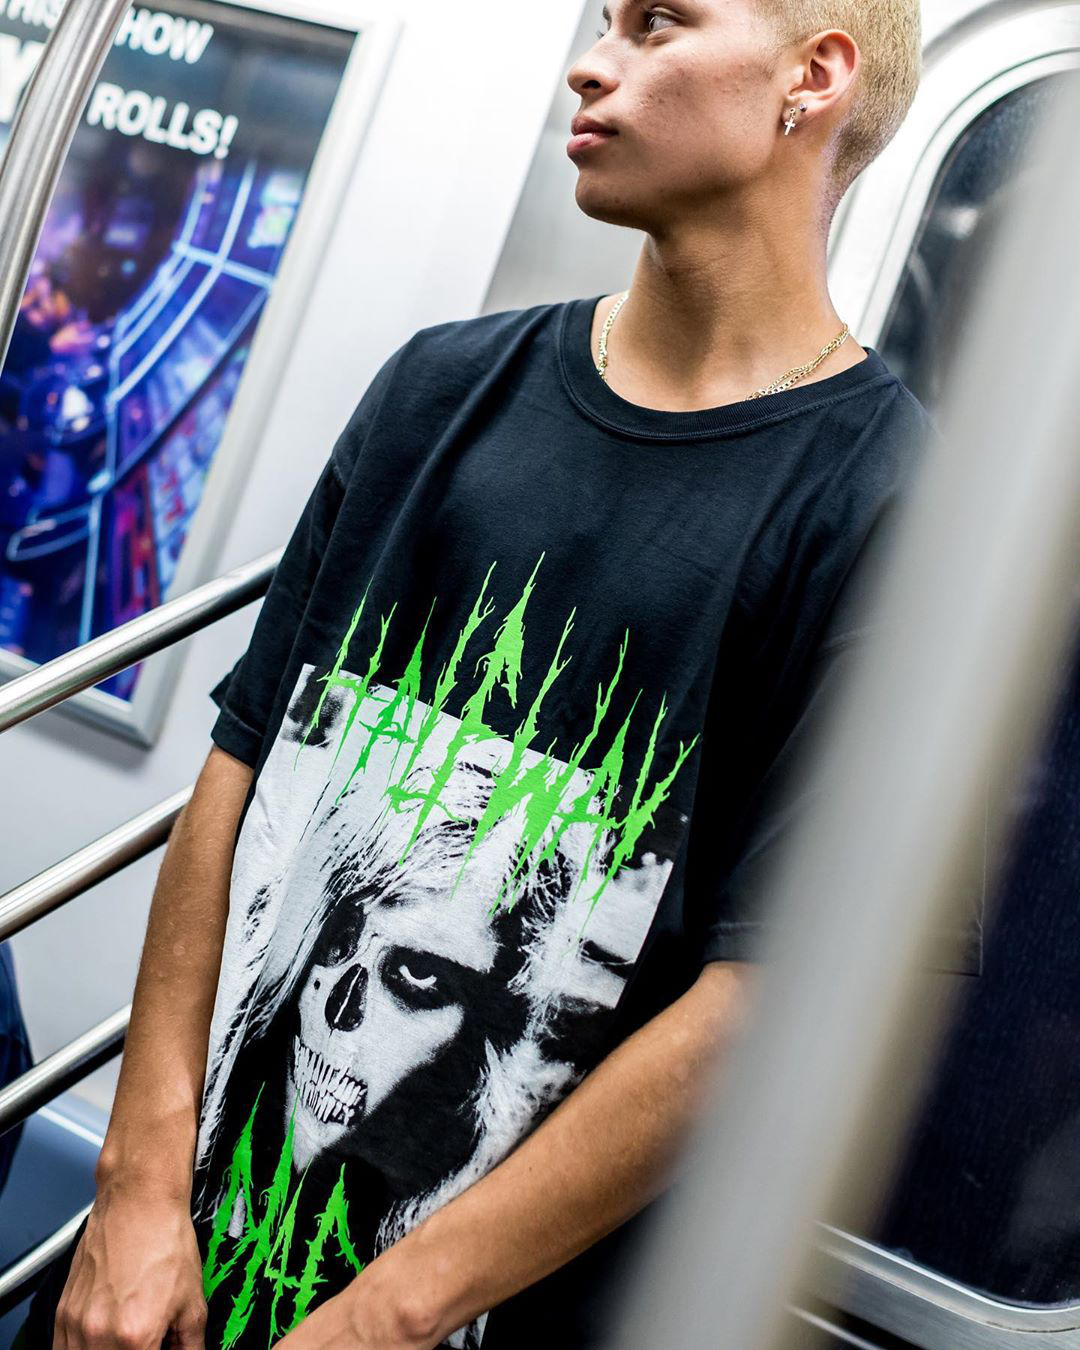

In [190]:
#display the post with most positive reviews
load_img(full_images2[36])

In [191]:
#get the data of the specific post from the general dataframe
all_images.loc[236]

__typename                                                  GraphImage
comments_disabled                                                False
dimensions                               {'height': 750, 'width': 750}
url                  https://scontent-vie1-1.cdninstagram.com/v/t51...
likes                                                           236949
caption              {'edges': [{'node': {'text': 'Happy birthday @...
comments                                                          1882
id                                                 2170627449532430280
is_video                                                         False
username                                         robkardashianofficial
video_view_count                                                   NaN
Name: 236, dtype: object

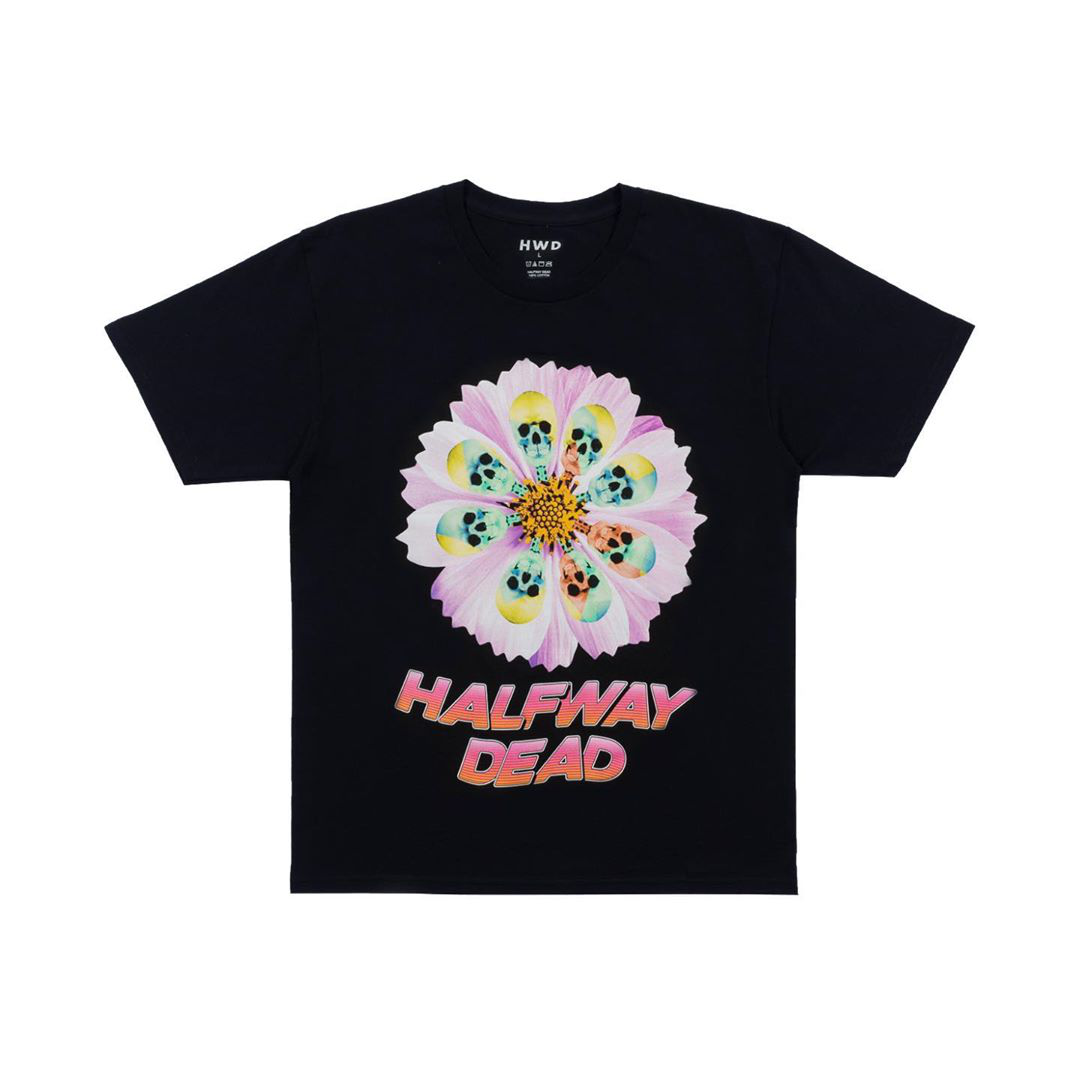

In [192]:
load_img(full_images2[98])

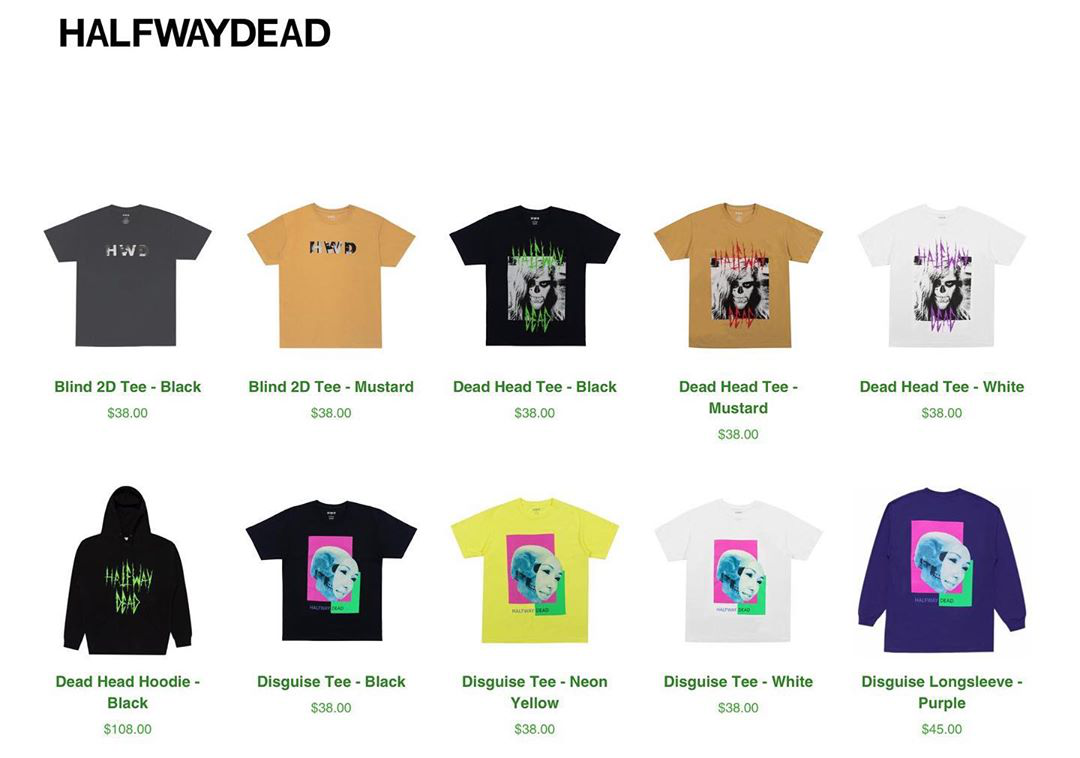

In [95]:
load_img(full_images2[42])

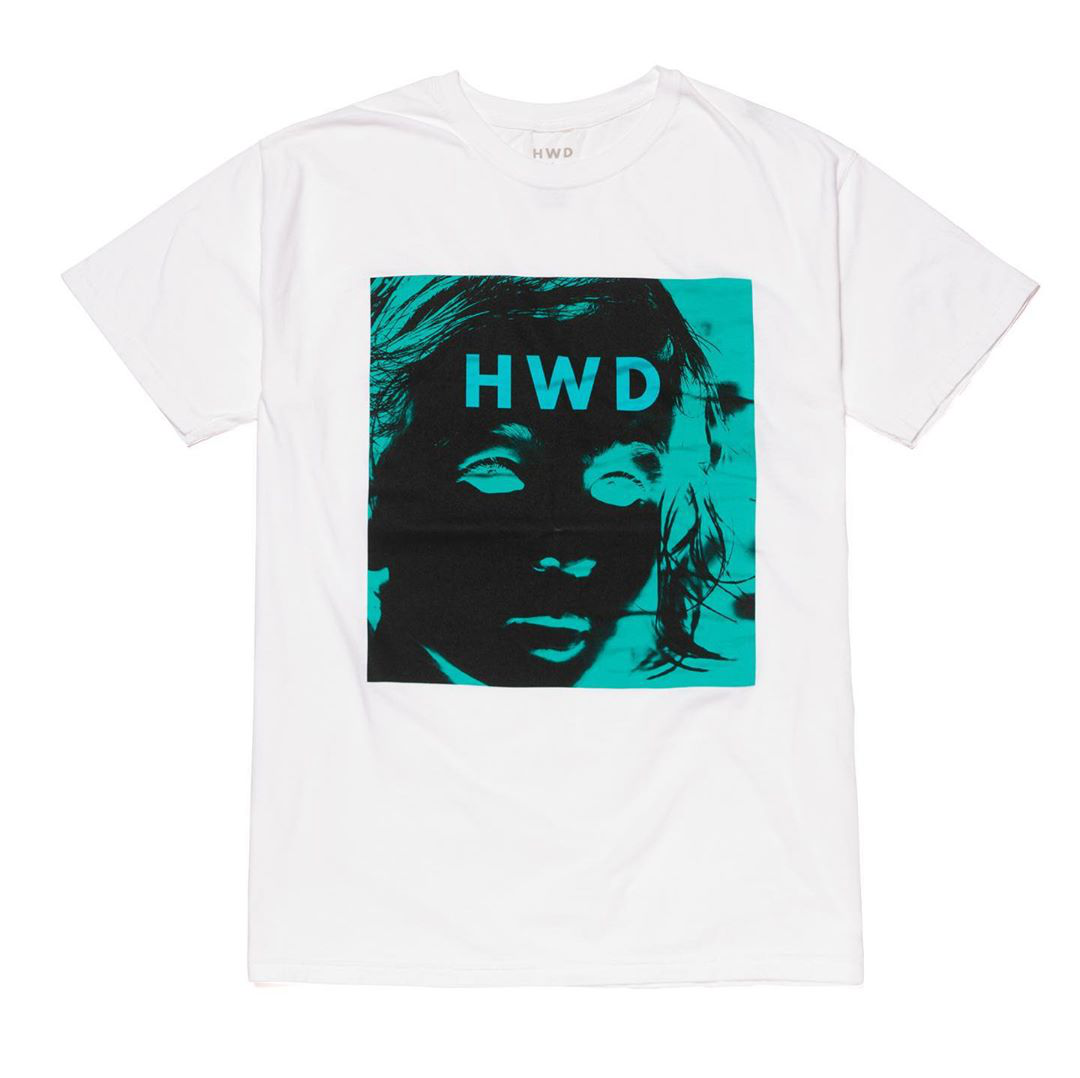

In [135]:
#display the posts with most negative comments
load_img(full_images2[29])

In [138]:
#get the data of the specific post from the general dataframe
all_images.loc[229]

__typename                                                  GraphImage
comments_disabled                                                False
dimensions                             {'height': 1350, 'width': 1080}
url                  https://scontent-vie1-1.cdninstagram.com/v/t51...
likes                                                           248356
caption              {'edges': [{'node': {'text': 'Merry Christmas ...
comments                                                          1953
id                                                 2193352928638899063
is_video                                                         False
username                                         robkardashianofficial
video_view_count                                                   NaN
Name: 229, dtype: object

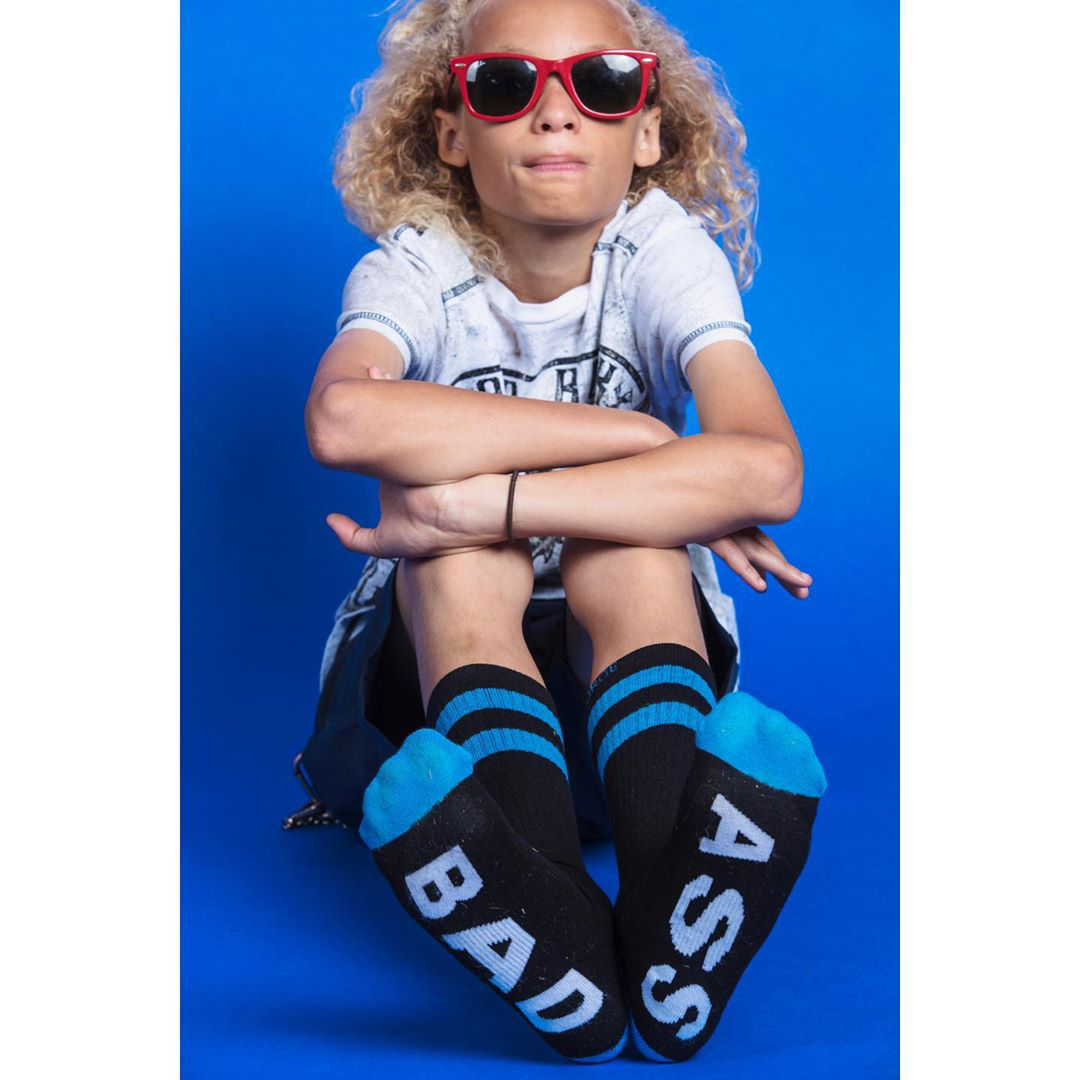

In [136]:
load_img(full_images2[82])

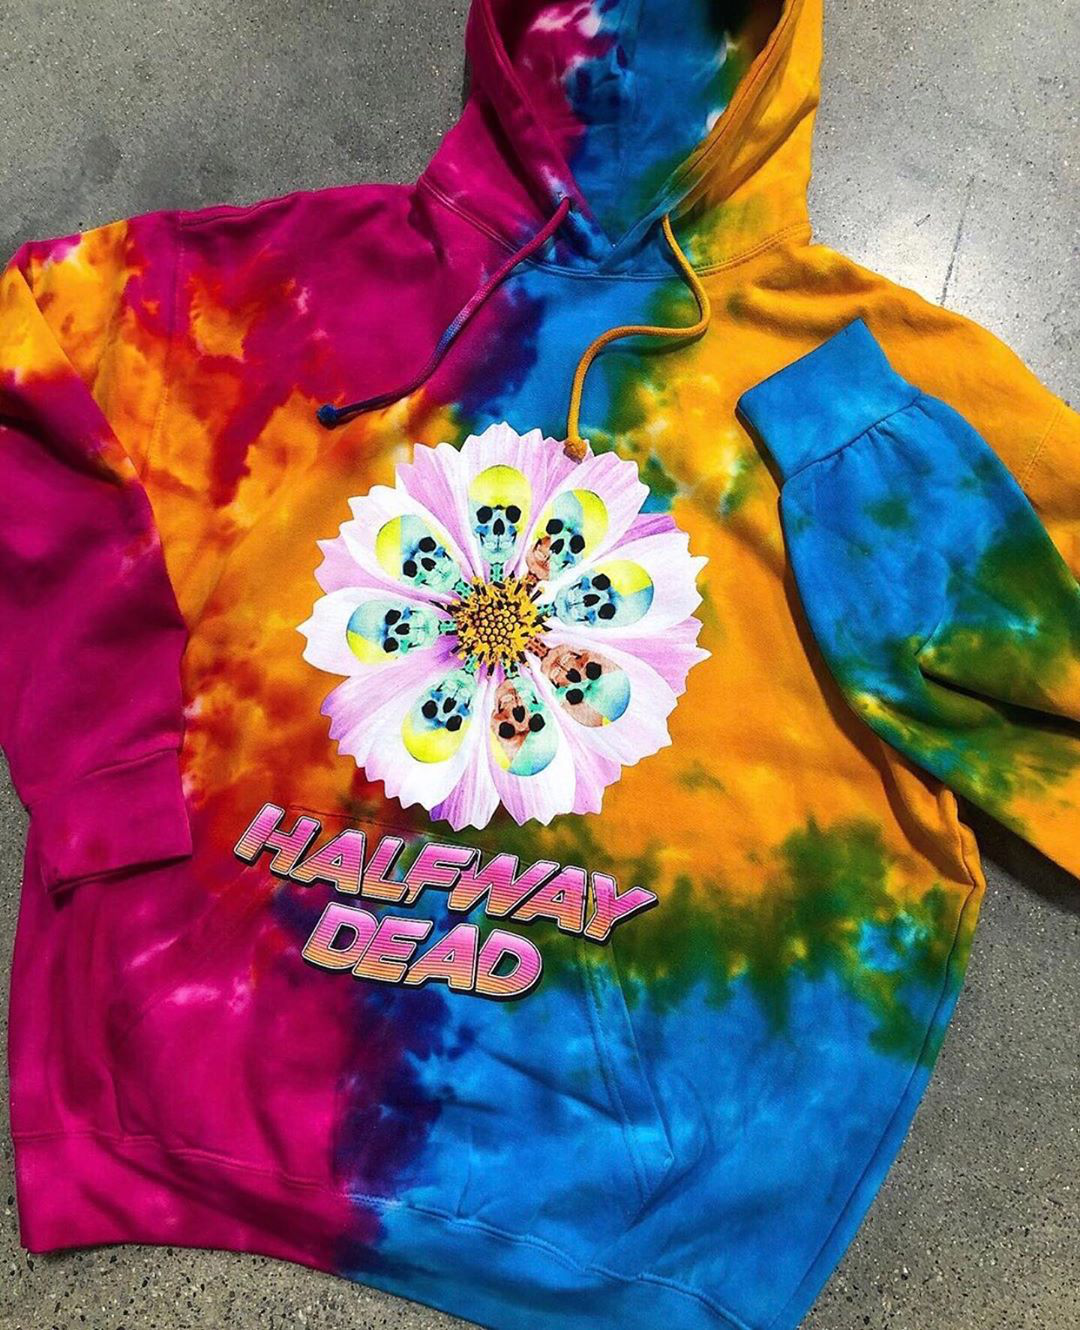

In [137]:
load_img(full_images2[62])

In [139]:
#load movie reviews from imdb data
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=2500)

In [140]:
import numpy as np

def vectorize_sequences(sequences, dimension=2500):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in tqdm(enumerate(sequences)):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# vectorized training data
x_train = vectorize_sequences(train_data)
# vectorized test data
x_test = vectorize_sequences(test_data)

C:\Users\km663\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [141]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [143]:
#make a model and add layers to it
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(2500,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))
#compile the model
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

In [144]:
#divide the dataset
val_set_x = x_train[:2500]
the_rest_train_set_x = x_train[2500:]

val_set_y = y_train[:2500]
the_rest_train_set_y = y_train[2500:]

In [145]:
#train the model
history = model.fit(the_rest_train_set_x,
                    the_rest_train_set_y,
                    epochs=20,
                    batch_size=512,
                    validation_data=(val_set_x, val_set_y))

Train on 22500 samples, validate on 2500 samples
Epoch 1/20
22500/22500 [==============================] - 2s 78us/step - loss: 0.1541 - accuracy: 0.8000 - val_loss: 0.1123 - val_accuracy: 0.8492
Epoch 2/20
22500/22500 [==============================] - 1s 41us/step - loss: 0.0907 - accuracy: 0.8833 - val_loss: 0.0972 - val_accuracy: 0.8672
Epoch 3/20
22500/22500 [==============================] - 1s 42us/step - loss: 0.0769 - accuracy: 0.8984 - val_loss: 0.0982 - val_accuracy: 0.8656
Epoch 4/20
22500/22500 [==============================] - 1s 48us/step - loss: 0.0716 - accuracy: 0.9068 - val_loss: 0.0916 - val_accuracy: 0.8764
Epoch 5/20
22500/22500 [==============================] - 1s 39us/step - loss: 0.0677 - accuracy: 0.9143 - val_loss: 0.1002 - val_accuracy: 0.8632
Epoch 6/20
22500/22500 [==============================] - 1s 41us/step - loss: 0.0662 - accuracy: 0.9152 - val_loss: 0.1002 - val_accuracy: 0.8632
Epoch 7/20
22500/22500 [==============================] - 1s 42us/ste

In [146]:
#test the model by predicting the sentiment scores using the test set
model.predict(x_test)

array([[0.00729832],
       [0.99936837],
       [0.9731611 ],
       ...,
       [0.02546242],
       [0.00313286],
       [0.9610655 ]], dtype=float32)

In [332]:
#give separate variable to the data from the json files which were labeled earlier as 'data'
part_json=data['GraphImages']
part_json1=data['GraphImages']
part_json2=data['GraphImages']

In [333]:
#divide the dataframes to a smaller part. this is done because when tokenizing later the data, the amount of memory...
#required is a lot. i kept getting memory error. so had to cut down on a lot of things
part_json=part_json[:len(part_json)//10]
part_json1=part_json1[:len(part_json1)//10]
part_json2=part_json2[:len(part_json2)//10]

In [334]:
#loop through the divided part of the data and add comments from each post to a general 2D array
#label each comment with the post_id
post_id=0
comments_part=[[]for post in half_json1]
for comment in part_json1:
    post_id+=1
    for i in comment['comments']['data']:
        comments_part[0].append(i['text'])
        comments_part[1].append(post_id)
for comment2 in part_json1:
    post_id+=1
    for i in comment2['comments']['data']:
        comments_part[0].append(i['text'])
        comments_part[1].append(post_id)
for comment3 in part_json1:
    post_id+=1
    for i in comment3['comments']['data']:
        comments_part[0].append(i['text'])
        comments_part[1].append(post_id)

In [335]:
#make a dataframe from the array with the comments
df_half_json=pd.DataFrame(columns=['comments','post_id'])

In [336]:
df_half_json['comments']=comments_part[0]
df_half_json['post_id']=comments_part[1]

In [337]:
df_half_json

comments  post_id
0       Gotta repost this on Mother’s Day cause it’s s...        1
1                                  @kassy_k_angehell done        1
2                                                ❤️🔥 #f4f        1
3                                                    💕💕💕💕        1
4                       @a.travellers.travelogue thankx 💕        1
...                                                   ...      ...
224074                                                 ❤️       30
224075                                   @fatii_raadd 😘😘😘       30
224076                                              wowie       30
224077                                             ❤️❤️❤️       30
224078                             Stay safe stay home ❤️       30

[224079 rows x 2 columns]

In [306]:
#tokenize the comments. this is so that they will be suitable for the model
from keras.preprocessing.text import Tokenizer

samples = comments_part[0]

# We create a tokenizer, configured to only take
# into account the top-2500 most common words
tokenizer = Tokenizer(num_words=2500)
# This builds the word index
tokenizer.fit_on_texts(samples)

# This turns strings into lists of integer indices.
sequences = tokenizer.texts_to_sequences(samples)

# This gets the one-hot binary representations.
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

# This is how you can recover the word index that was computed
word_index = tokenizer.word_index
print('Found {} unique tokens.'.format(len(word_index)))

Found 55327 unique tokens.


In [307]:
#predict the sentiment results of the comments using the model
predic=model.predict(one_hot_results)

In [308]:
#loop through the results and add them to an array
results=[]
for i in predic:
    results.append(i)

In [309]:
df_results=pd.DataFrame(columns=['result','post_id'])

In [310]:
#make a dataframe to house the array with the sentiment scores, as well as the post_ids that were determined earlier
df_results['result']=results
df_results['post_id']=comments_part[1]

In [311]:
df_results

result  post_id
0       [0.21019727]        1
1       [0.84996766]        1
2       [0.40075758]        1
3        [0.5376736]        1
4          [0.63844]        1
...              ...      ...
224074   [0.4939833]       30
224075  [0.29244712]       30
224076   [0.5235703]       30
224077   [0.6302815]       30
224078   [0.6316825]       30

[224079 rows x 2 columns]

In [319]:
#remove the nested array and get the specific elements
for i in df_results.result:
    np.asscalar(i)
    

C:\Users\km663\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  


In [325]:
test_df=df_results

In [328]:
#groupby the post_id to get the mean score for each post
df_result_mean=test_df.groupby(['post_id']).mean()

In [329]:
#the score results from the sentiment analysis using the earlier made model
df_result_mean

result
post_id          
1        0.501155
2        0.498207
3        0.499237
4        0.543475
5        0.505359
6        0.504023
7        0.494416
8        0.509489
9        0.504156
10       0.509616
11       0.501155
12       0.498207
13       0.499237
14       0.543475
15       0.505359
16       0.504023
17       0.494416
18       0.509489
19       0.504156
20       0.509616
21       0.501155
22       0.498207
23       0.499237
24       0.543475
25       0.505359
26       0.504023
27       0.494416
28       0.509489
29       0.504156
30       0.509616

In [331]:
#score results from the Vader sentiment analyser that was downloaded
df_score_mean

score
post_id          
1        0.204949
2        0.167215
3        0.148976
4        0.293698
5        0.293290
...           ...
296      0.444997
297      0.024911
298      0.475656
299      0.126321
300      0.079378

[299 rows x 1 columns]

In [338]:
#it can be seen that scores from the model and Vader sentiment analyser are different. this is quite an expected result
#this is because the Vader analyser is specifically made to be used with social media language and that includes emojis
#and improper language grammatically. the model using the imdb reviews as the training data does not recognize emojis
#and may interpret the really short and perhaps grammatically incorrect comments completely differently from the 
# original intention